In [38]:
# %cp /kaggle/input/mdspa2/ /kaggle/working/ -r
%cd /kaggle/working/mdspa2
!ls

/kaggle/working/mdspa2
challenge  challenge_100.jpg  create_rgb_data.py


In [20]:
import os
import cv2
import cvxpy as cp
import numpy as np
import numpy.linalg as LA

def objective_func(s):
    return LA.norm(s, ord=1)

def constraint_func(s):
    a = (y - np.matmul(C, s)).T
    return np.inner(a, a)[0, 0]

(100, 100, 3)


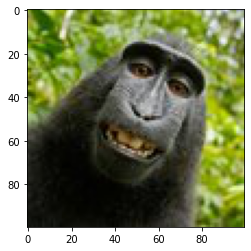

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("challenge_100.jpg")
print(img.shape)
imgplot = plt.imshow(img)

In [22]:
!mkdir challenge
!python create_rgb_data.py

# Blue

/kaggle/working/mdspa2/challenge/b
A_inv.npy  C.npy  incomplete.png  original_with_crop.png  y.npy
(10000, 10000) (3000, 10000) (3000,)
[ 5.34921398e+03  1.91223025e+03 -6.19586087e+02 ...  1.21875803e+01
 -8.10674624e-03 -8.98553521e-03]
[0.60391298 1.3468049  0.07019806 ... 0.17317748 1.71693696 0.01475876]
Values 122905.07062976665 10534213.99999613


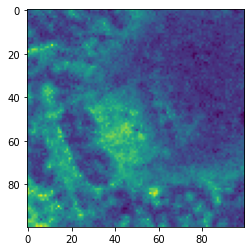

In [25]:
%cd /kaggle/working/mdspa2/challenge/b
!ls

y = np.load('y.npy').reshape(-1)
C = np.load('C.npy')
A_inv = np.load('A_inv.npy')
print(A_inv.shape, C.shape, y.shape)

# Construct the problem.
x = cp.Variable(shape=10000)
objective = cp.Minimize(cp.norm(x, 1))
# constraints = [cp.norm(y - C*x, 2) <= 1e-5]
constraints = [C*x - y == 0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve(verbose=True, solver=cp.OSQP)
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

solution = x.value
solution = solution.reshape(-1, 1)

print('Values', objective_func(solution), constraint_func(solution))

blue = np.matmul(A_inv, solution)
blue = blue.reshape(100, 100)

plt.imshow(blue)

with open('b_solution.npy', 'wb') as f:
  np.save(f, solution)

/kaggle/working/mdspa2/challenge/g
A_inv.npy  C.npy  incomplete.png  original_with_crop.png  y.npy
(10000, 10000) (3000, 10000) (3000,)


/opt/conda/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 20000, constraints m = 23000
          nnz(P) + nnz(A) = 29558856
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -8.0000e+04   2.55e+02   7.32e+08   1.00e-01   8.69e+01s
 200   1.1605e+05   1.15e+00   2.18e-01   1.00e-01   1.10e+02s
 400   1.1549e+05   2.00e+00   3.41e

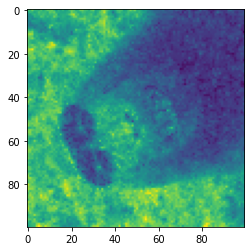

In [27]:
%cd /kaggle/working/mdspa2/challenge/g
!ls

y = np.load('y.npy').reshape(-1)
C = np.load('C.npy')
A_inv = np.load('A_inv.npy')
print(A_inv.shape, C.shape, y.shape)

# Construct the problem.
x2 = cp.Variable(shape=10000)
objective = cp.Minimize(cp.norm(x2, 1))
# constraints = [cp.norm(y - C*x, 2) <= 1e-5]
constraints = [C*x2 - y == 0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve(verbose=True, solver=cp.OSQP)
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

solution = x2.value
solution = solution.reshape(-1, 1)

print('Values', objective_func(solution), constraint_func(solution))

green = np.matmul(A_inv, solution)
green = green.reshape(100, 100)

plt.imshow(green)

with open('g_solution.npy', 'wb') as f:
  np.save(f, solution)

In [ ]:
##### %cd /kaggle/working/mdspa2/challenge/r
!ls

y = np.load('y.npy').reshape(-1)
C = np.load('C.npy')
A_inv = np.load('A_inv.npy')
print(A_inv.shape, C.shape, y.shape)

# Construct the problem.
x3 = cp.Variable(shape=10000)
objective = cp.Minimize(cp.norm(x3, 1))
# constraints = [cp.norm(y - C*x, 2) <= 1e-5]
constraints = [C*x3 - y == 0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve(verbose=True, solver=cp.OSQP)
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

solution = x3.value
solution = solution.reshape(-1, 1)

print('Values', objective_func(solution), constraint_func(solution))

red = np.matmul(A_inv, solution)
red = red.reshape(100, 100)

plt.imshow(red)

with open('gr_solution.npy', 'wb') as f:
  np.save(f, solution)

(3, 100, 100)
(100, 100, 3)


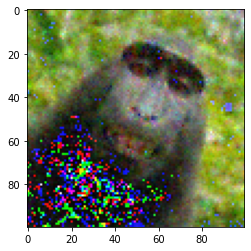

In [76]:
image = np.array([red.astype('uint8'), green.astype('uint8'), blue.astype('uint8')])
print(image.shape)
image = image.transpose(2, 1, 0)
print(image.shape)
plt.imshow(image)